In [1]:
import pandas as pd
import re
import warnings
from tqdm import tqdm

In [2]:
!pip install deep_translator
!pip install langid
import langid
from deep_translator import GoogleTranslator
!pip install googletrans==3.1.0a0
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter
!pip install pymorphy2
import pymorphy2

     |████████████████████████████████| 97 kB 3.2 MB/s 
     |████████████████████████████████| 97 kB 4.4 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.
     |████████████████████████████████| 1.9 MB 4.3 MB/s 
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=e2a0096e4c674f0eb2ca7998e7a6ab72c60cdeaeb7eb28d2b4b54c4b2646998b
  Stored in directory: /root/.cache/pip/wheels/2b/bb/7f/11e4db39477278161e882eadc46fb5

In [3]:
from typing import Dict
from matplotlib import pyplot
import seaborn as sns

In [4]:
!gdown --id 15_FfenvHFoJVcPu6gGx9osLn71uDJ-Et

Downloading...
From: https://drive.google.com/uc?id=15_FfenvHFoJVcPu6gGx9osLn71uDJ-Et
To: /content/vacancies.csv
100% 1.05G/1.05G [00:24<00:00, 42.6MB/s]


In [5]:
df = pd.read_csv("vacancies.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Парсер навыков из вакансий с [гитхаба](https://github.com/keshavbansal015/Job-Description-Parser)

P.S. другие парсеры (в основном платные и для CV):


1.   https://www.maprecruit.ai/parsers - 30 файлов потестила в демо
2.   https://docs.microsoft.com/en-us/connectors/candidatezip/#parse-jd-via-file-content - не смогла зарегистирироваться
3.   http://www.reshufl.com/demo/ - потестила демо



In [ ]:
!gdown --id 179NC9uvqIbyahO1R3yyiYHV2srB38-5-

Downloading...
From: https://drive.google.com/uc?id=179NC9uvqIbyahO1R3yyiYHV2srB38-5-
To: /content/Resume_JD parser(spaCy).zip
100% 205M/205M [00:01<00:00, 113MB/s]


In [ ]:
import zipfile
zf = zipfile.ZipFile("parser.zip")
zf.extractall()

In [ ]:
# !pip install spacy
import spacy
sys.path.append(os.path.abspath('./Resume_JD parser(spaCy)/src'))

from func import *
from constants import *
from init_parser import init_parser_func
from tqdm import tqdm
sys.path.append(os.path.abspath('..'))

nlp = spacy.load('en_core_web_sm')

if __name__ == '__main__':)
	matcher = init_parser_func(nlp, './Resume_JD parser(spaCy)/input/Skillset.xlsx', file_type="excel")
	
	final_database = pd.DataFrame()	

	for each in tqdm(range(len(df))):

		text = df.loc[each, 'description']
		application_subject = df.loc[each,'id']
		data = create_profile(nlp,matcher,text,application_subject)
		final_database = final_database.append(data)

	# Saving the database
	final_database.to_csv('./Resume_JD parser(spaCy)/input/Data.csv', index=False)

/content
Success!


100%|██████████| 164916/164916 [2:08:26<00:00, 21.40it/s]


In [ ]:
final_database

,Company/Candidate Name,Skill,Sub-skill,Count
0,47319343,Coding,SQL,1
0,47472541,Analytics,Excel,1
0,46134407,Business,MS Office,1
0,47513275,Business,MS Office,1
0,47727709,Coding,JavaScript,1
...,...,...,...,...
0,46120872,Analytics,Excel,1
0,47121032,Business,MS Office,1
0,47187542,DevOps,MS Word,1
1,47187542,Analytics,Excel,1


# Парсер описания вакансий с помощью регулярных выражений

In [6]:
lang, lang_list = {}, []
def lang_variety(x):
  language = langid.classify(x)[0]
  lang_list.append(language)
  if language in lang:
    lang[language] += 1
  else:
    lang[language] = 1
df['description'].apply(lambda x: lang_variety(x));

In [7]:
df['language'] = pd.DataFrame(lang_list)

In [8]:
def plot_dict(d: Dict):
  """
  Создаём метод, который строит гистограмму для словаря
  Аргумент:
  d - словарь, который нужно изобразить на гистограмме
  """
  d = dict(sorted(d.items(), key=lambda item: -item[1]))
  keys = list(d.keys())
  vals = [d[k]/len(df) for k in keys]
  sns.barplot(x=keys, y=vals, color='green')
  pyplot.xticks(rotation=45, ha="right");

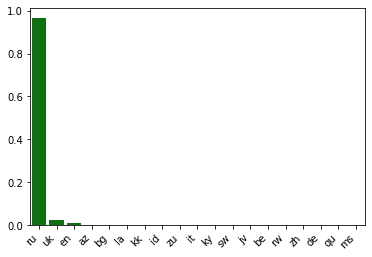

In [9]:
# Строим распределение вакансий по языкам, на которых написано описание вакансии
plot_dict(lang)

In [ ]:
# Переводим описания вакансий не на русском
translator = Translator()
df['description'][df['language'] != 'ru'] = df['description'].apply(lambda x: translator.translate(x, dest='ru').text)

In [6]:
def jd(x: str, regular_try: str, regular_except: str, regular_except_try: str, result: list, result_: list):
  """
  Создаём метод, который ищет по заданному регулярному выражению в строке
  Аргументы:
  x - строка в датафрейме с описанием вакансий
  regular_try, regular_except, regular_except_try - регулярные выражения, согласно которым работает парсер
  result - список, куда записывается результат работы метода
  result_ - список (для столбца description), из которого удаляются регулярные выражения
  """
  try:
    result.append(re.search(regular_try, x).group(0))
    result_.append(re.sub(regular_try, '', x))
  except:
    try:
      result.append(re.search(regular_except, x).group(0))
      result_.append(re.sub(regular_except, '', x))
    except:
      try:
        result.append(re.search(regular_except_try, x).group(0))
        result_.append(re.sub(regular_except_try, '', x))
      except:
        result.append(re.search(regular_except, x))
        result_.append(re.sub(regular_except, '', x))

In [7]:
def jd_new_column(regular_try: str, regular_except: str, regular_except_try: str, new_column: str, df: pd.DataFrame):
  """
  Создаём метод, который создаёт новый столбец после парсинга
  Аргументы:
  regular_try, regular_except, regular_except_try - регулярные выражения, согласно которым работает парсер
  new_column - название столбца, который создаётся
  df - датафрейм, который содержит описание вакансий
  """
  result, result_ = [], []
  df['description'].apply(lambda x: jd(x, regular_try, regular_except, regular_except_try, result, result_));
  df[f'description_{new_column}'] = pd.DataFrame(result)[0]
  df['description'] = pd.DataFrame(result_)

In [8]:
jd_new_column(r'(?i)обязанности:.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|чем предстоит заниматься.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|(задачи|задачах):.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|ищем.{1,25}которые\s{1,}будут.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))|что нужно делать.*?(?=(<strong>|<\/ul>|требования|требование|условия|предлагаем))', 
              r'(?i)обязанности.*?(\.|требования|требование|условия|предлагаем)|чем предстоит заниматься.*?(\.|требования|требование|условия|предлагаем)|(задачи|задачах).*?(\.|требования|требование|условия|предлагаем)|ищем.{1,15}которые\s{1,}будут.*?(\.|требования|требование|условия|предлагаем)|что нужно делать.*?(\.|требования|требование|условия|предлагаем)',
              r'(?i)обязанности.+|чем предстоит заниматься.+|(задачи|задачах).+|ищем.{1,15}которые\s{1,}будут.+|что нужно делать.+',
                       'responsibilities', df);

In [9]:
jd_new_column(r'(?i)(требования|требование):.*?(?=(<strong>|<\/ul>|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|условия|предлагаем))', 
              r'(?i)(требования|требование).*?(\.|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|условия|предлагаем)',
              r'(?i)(требования|требование).+',
                       'requirements', df);

In [10]:
jd_new_column(r'(?i)условия:.*?(?=(<strong>|<\/ul>|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования))|предлагаем.*?(?=(<strong>|<\/ul>|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования))', 
              r'(?i)условия.*?(\.|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования)|предлагаем.*?(\.|обязанности|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать|требование|требования)',
              r'(?i)условия.+|предлагаем.+',
                       'conditions', df);

In [11]:
# Убираем из столбцов слова, по которым выделялись столбцы
df['description_responsibilities'] = df['description_responsibilities'].apply(lambda x: re.sub(r'(?i)(обязанности:|обязанности|чем предстоит заниматься|задачи|задачах|ищем.{1,25}которые\s{1,}будут|что нужно делать)', '', str(x)))
df['description_requirements'] = df['description_requirements'].apply(lambda x: re.sub(r'(?i)(требования|требование)', '', str(x)))
df['description_conditions'] = df['description_conditions'].apply(lambda x: re.sub(r'(?i)(условия|предлагаем)', '', str(x)))

In [12]:
df[['description_responsibilities', 'description_requirements', 'description_conditions', 'description']].head()

,description_responsibilities,description_requirements,description_conditions,description
0,</strong></p> <ul> <li>Организация и проведени...,:</strong></p> <ul> <li>Опыт работы в должност...,:</strong></p> <ul> <li>Официальное трудоустро...,<p><em><strong>Агропромышленный холдинг «МИРАТ...
1,"</strong><br />Доставлять банковские продукты,...",None,"</strong></p> <ul> <li>2/2 или 5/2. Дни, свобо...",<p>Тинькофф - первый онлайн банк в России. С 2...
2,</strong></p> <ul> <li>Сварка кузовов и рам те...,:</strong> <ul> <li>Опыт работы от 3х лет</li>...,:</strong> <ul> <li>Трудоустройство согласно Т...,<p>В Московскую область для работы вахтовым ме...
3,<br />- Контроль и координация работы отдела;<...,:<br />- Опыт работы в продажах приветствуется...,":<br />- Оплата без задержек, премии, бонусы;<...","<p><br />- Работа в молодом, дружном коллектив..."
4,</strong> <ul> <li>ведение первичного учета</l...,:</strong> <ul> <li>высшее образование</li> <l...,:</strong> <ul> <li>5 дневный рабочий день</li...,<strong></ul> <strong></ul> <strong></ul>


In [19]:
df[['description_responsibilities', 'description_requirements', 'description_conditions', 'description']].describe()

,description_responsibilities,description_requirements,description_conditions,description
count,164916,164916,164916,164916
unique,104675,93862,101842,89079
top,None,None,None,<strong></ul> <strong></ul> <strong></ul>
freq,26417,41267,23283,27856


In [12]:
df['specializations_profarea_name'] = df['specializations_profarea_name'].apply(eval)
df['prof_area'] = df['specializations_profarea_name'].apply(lambda x: x[0])

In [13]:
# Считаем наиболее часто встречающиеся слова в описании вакансий, за исключением stopwords и небуквенных символов
stopwords = nltk.corpus.stopwords.words('russian')
symbols = ['/em', '|', 'п', 'з', '[]', '<', '>', '...', ',', '-', '.', ';', ':', '«', '»', '!', '(', ')', '[', ']', '/', '–', '—', '&', 'li', '/li', 'strong', '/strong','p', '/p','ul', '/ul','quot', 'em', 'br', 'none', '•']
morph = pymorphy2.MorphAnalyzer()
def mostcommon(col: str, prof_area: str, words: int, split: bool) -> Dict:
  """
  Создаём метод, который создаёт словарь из самых часто встречающихся слов в столбце
  Аргументы:
  col - название столбца, из которого берём слова
  words - количество самых часто встречающихся слов
  Возвращает:
  most - словарь из самых часто встречающихся слов в столбце
  """
  if split:
    s = df[col][df['prof_area'] == prof_area].to_string()
  else:
    s = df[col].to_string()
  allWords = nltk.tokenize.word_tokenize(s)
  allWordExceptStopDist = nltk.FreqDist(morph.parse(w.lower())[0].normal_form for w in allWords if w.lower() not in symbols and w.lower() not in stopwords)
  most = dict(Counter(allWordExceptStopDist).most_common(words))
  return most

100%|██████████| 56/56 [08:39<00:00,  9.27s/it]
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9989 missing from current font.
  font.set_text(s, 0, flags=flags)


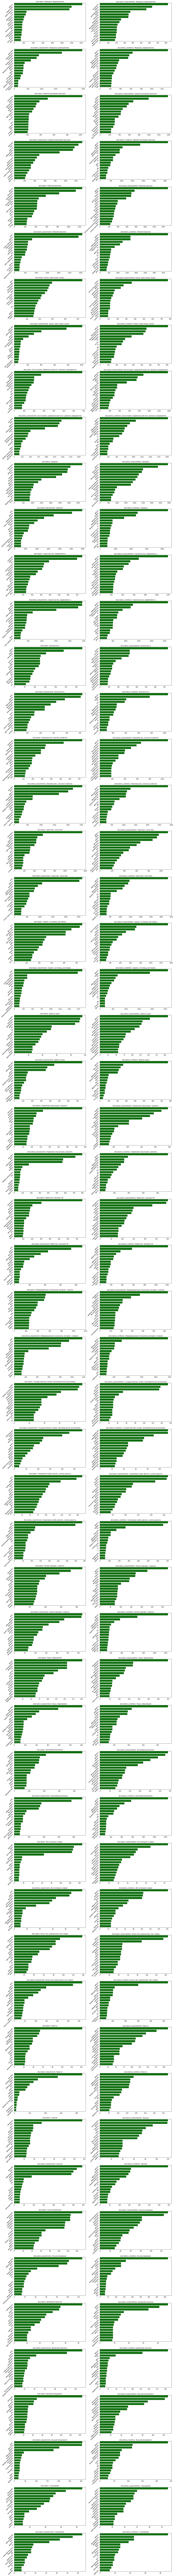

In [14]:
# d_all = []
els = df['prof_area'].dropna().unique()
nrows = 2*len(els)
fig, ax = pyplot.subplots(nrows=nrows, ncols=2, figsize=(20,12*28))
k, s = 0, 0
for i in tqdm(range(nrows)):
  for j in range(2):
    if i%2==0:
      if j == 0:
        col = 'description'
      elif j == 1:
        col = 'description_responsibilities'
    else:
      if j == 0:
        col = 'description_requirements'
      else:
        col = 'description_conditions'
    d = mostcommon(col, els[k], 15, True)
    # d_all.append(d)
    # d = all_d[s]
    keys = [x.strip() for x in list(d.keys())]
    vals = [(d[k]) for k in keys]
    sns.barplot(x=vals, y=keys, color='green', ax = ax[i, j])
    ax[i, j].set_title(f'{col}. {els[k]}', fontsize=10)
    pyplot.setp(ax[i, j].yaxis.get_majorticklabels(), rotation=45)
    ax[i, j].tick_params(labelsize=10)
    s += 1
  if i%2 != 0:
    k += 1

In [18]:
def plot_dict_desc(d: Dict, i: int, j:int, title: str):
  """
  Создаём метод, который строит гистограмму для словаря
  Аргумент:
  d - словарь, который нужно изобразить на гистограмме
  i - номер строки в графике
  j - номер столбца в графике
  title - название графика
  """
  keys = [x.strip() for x in list(d.keys())]
  vals = [(d[k]) for k in keys]
  sns.barplot(x=vals, y=keys, color='green', ax = ax[i, j])
  ax[i, j].set_title(title)
  pyplot.setp(ax[i, j].yaxis.get_majorticklabels(), rotation=45)

In [15]:
description = mostcommon('description', '', 20, False)
description_responsibilities = mostcommon('description_responsibilities', '', 20, False)
description_conditions = mostcommon('description_conditions', '', 20, False)
description_requirements = mostcommon('description_requirements', '', 20, False)

In [16]:
description_responsibilities = mostcommon('description_responsibilities', '', 20, False)
description_conditions = mostcommon('description_conditions', '', 20, False)
description_requirements = mostcommon('description_requirements', '', 20, False)

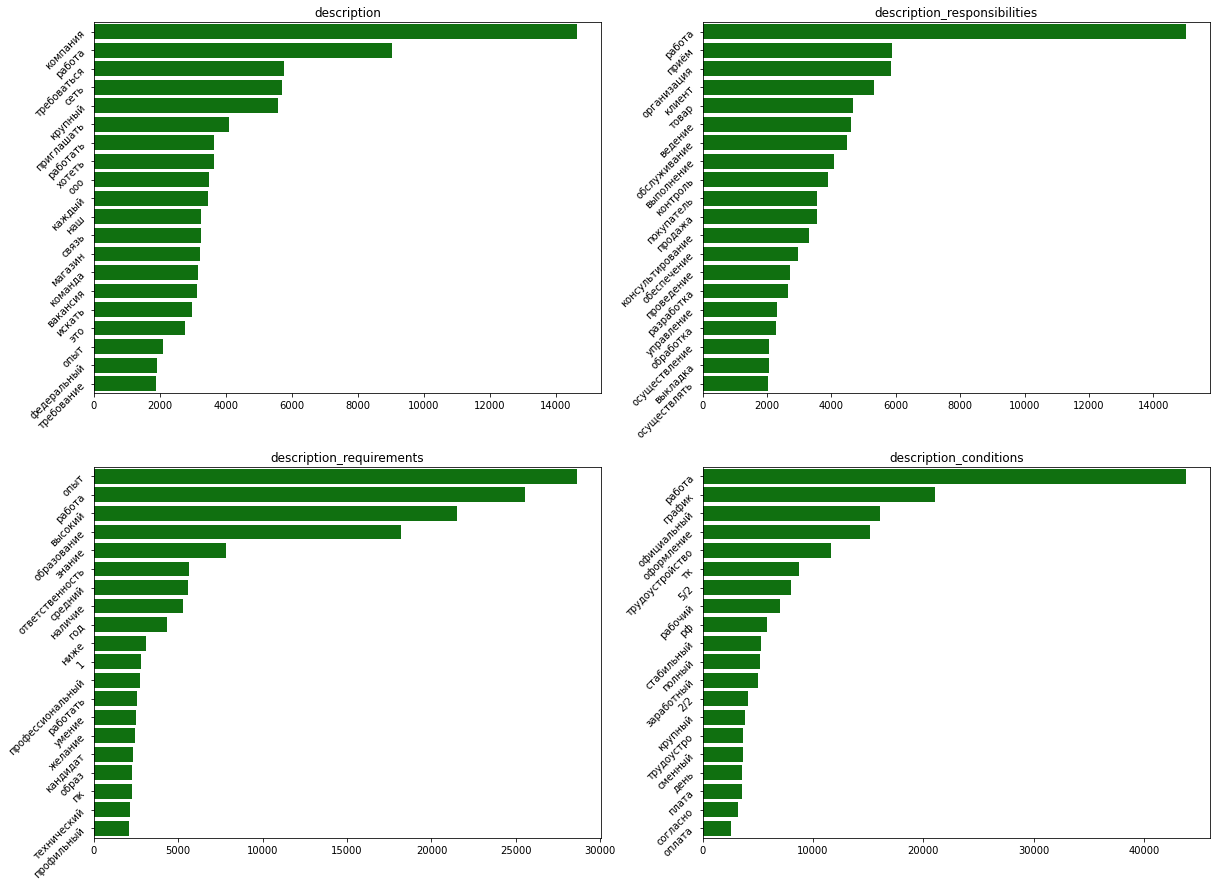

In [19]:
fig, ax = pyplot.subplots(nrows=2, ncols=2, figsize=(20,15))
plot_dict_desc(description, 0, 0, 'description')
plot_dict_desc(description_responsibilities, 0, 1, 'description_responsibilities')
plot_dict_desc(description_requirements, 1, 0, 'description_requirements')
plot_dict_desc(description_conditions, 1, 1, 'description_conditions')

In [20]:
# Разделяем столбец из строк на столбец из списков
df['description_responsibilities'] = df['description_responsibilities'].apply(lambda x: re.split('<li>|<br />|<p>', str(x)))
df['description_requirements'] = df['description_requirements'].apply(lambda x: re.split('<li>|<br />|<p>', str(x)))
df['description_conditions'] = df['description_conditions'].apply(lambda x: re.split('<li>|<br />|<p>', str(x)))

In [21]:
def delete_code(x: list) -> list:
  """
  Создаём метод, который сначала удаляет код из каждого элемента списка, далее удаляет элементы, состоящие только из символов,
  и далее удаляет тег </li>, </p>
  Аргумент:
  x - список с набором обязанностей/требований и т.д.
  Возвращает:
  x - очищенный от элементов, состоящих только из кода, список
  """
  x_copy = x.copy()
  x_copy = [re.sub('<.*?>|&quot', '', el) for el in x_copy]
  x_ = x.copy()
  for i in range(len(x_)):
    if re.match(r"^[! #$%&()*+,.\/:;<=>?@[\]^_`{|}~—\"\-]*$", x_copy[i]) is not None or x_copy[i] == 'None' or x_copy[i] == '':
      x.remove(x_[i])
  x = [re.sub('</li>|</p>', '', el) for el in x]
  return x

In [22]:
df['description_responsibilities'] = df['description_responsibilities'].apply(delete_code)
df['description_requirements'] = df['description_requirements'].apply(delete_code)
df['description_conditions'] = df['description_conditions'].apply(delete_code)

In [23]:
df['len_description_responsibilities'] = df['description_responsibilities'].apply(len)
df['len_description_requirements'] = df['description_requirements'].apply(len)
df['len_description_conditions'] = df['description_conditions'].apply(len)

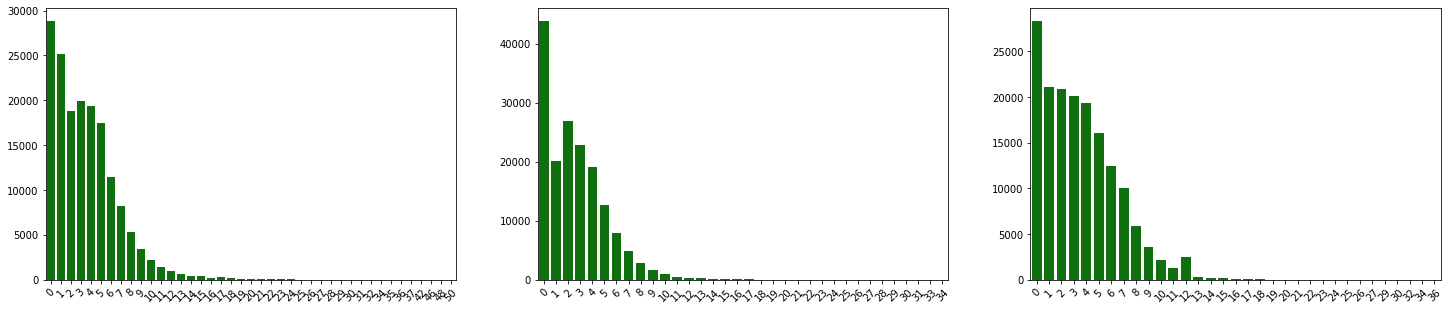

In [140]:
# Строим распределения вакансий по количеству обязанностей, требований, условий
warnings.simplefilter("ignore")
fig, ax = pyplot.subplots(nrows=1, ncols=3, figsize=(25,5))
sns.barplot(x=df['len_description_responsibilities'].value_counts().index, y=df['len_description_responsibilities'].value_counts().values, ax=ax[0], color='green')
sns.barplot(df['len_description_requirements'].value_counts().index, df['len_description_requirements'].value_counts().values, ax=ax[1], color='green')
sns.barplot(df['len_description_conditions'].value_counts().index, df['len_description_conditions'].value_counts().values, ax=ax[2], color='green')

for ax_i in ax:
  pyplot.setp(ax_i.xaxis.get_majorticklabels(), rotation=45)

In [24]:
df[['description_responsibilities', 'description_requirements', 'description_conditions', 'description']].head()

,description_responsibilities,description_requirements,description_conditions,description
0,[Организация и проведение медицинских осмотров...,"[Опыт работы в должности приветствуется; , Нал...",[Официальное трудоустройство (оплата больничны...,<p><em><strong>Агропромышленный холдинг «МИРАТ...
1,"[Доставлять банковские продукты, подписывать д...",[],"[2/2 или 5/2. Дни, свободные от выполнения раб...",<p>Тинькофф - первый онлайн банк в России. С 2...
2,"[Сварка кузовов и рам тележек вагонов метро , ...","[Опыт работы от 3х лет , Наличие подтверждения...","[Трудоустройство согласно ТК РФ , Суточные с п...",<p>В Московскую область для работы вахтовым ме...
3,"[- Контроль и координация работы отдела;, - Вы...","[- Опыт работы в продажах приветствуется;, - К...","[- Оплата без задержек, премии, бонусы;, - Пол...","<p><br />- Работа в молодом, дружном коллектив..."
4,"[ведение первичного учета , работа с банком и ...","[высшее образование , опыт работы в бухучете б...","[5 дневный рабочий день , оклад ]",<strong></ul> <strong></ul> <strong></ul>


In [150]:
# df[['description', 'description_responsibilities', 'description_requirements', 'description_conditions']].to_csv('dataframe.csv', index=False)